<a href="https://colab.research.google.com/github/neha1-1/SCT_DS_1/blob/main/intern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Absolute Error: ₹112.00
R² Score: -1.61


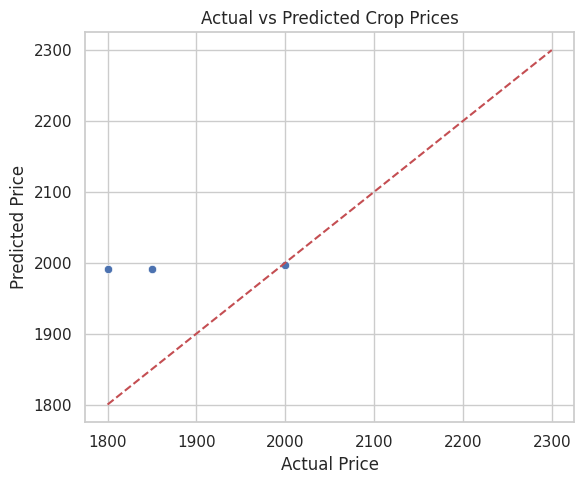

In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Step 2: Sample crop price dataset (replace this with real data when needed)
data = {
    'crop': ['rice', 'wheat', 'rice', 'maize', 'wheat', 'maize', 'rice', 'wheat'],
    'month': ['Jan', 'Feb', 'Mar', 'Jan', 'Mar', 'Feb', 'Apr', 'May'],
    'rainfall': [100, 80, 120, 90, 110, 85, 130, 95],
    'temperature': [22, 18, 25, 20, 24, 19, 26, 23],
    'price': [2000, 1800, 2200, 1900, 2100, 1850, 2300, 1950]
}

df = pd.DataFrame(data)

# Step 3: Encode categorical variables
le_crop = LabelEncoder()
le_month = LabelEncoder()
df['crop_encoded'] = le_crop.fit_transform(df['crop'])
df['month_encoded'] = le_month.fit_transform(df['month'])

# Step 4: Features and target
X = df[['crop_encoded', 'month_encoded', 'rainfall', 'temperature']]
y = df['price']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 7: Predictions
y_pred = model.predict(X_test)

# Step 8: Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: ₹{mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 9: Plot actual vs predicted
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Crop Prices")
plt.grid(True)
plt.tight_layout()
plt.show()
